# DAT210x - Programming with Python for DS

## Module4- Lab5

In [67]:
import pandas as pd

from scipy import misc
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt

In [68]:
# Look pretty...

# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

Create a regular Python list (not NDArray) and name it `samples`:

In [69]:
samples = []
colors = []

Code up a for-loop that iterates over the images in the `Datasets/ALOI/32/` folder. Look in the folder first, so you know how the files are organized, and what file number they start from and end at.

Load each `.png` file individually in your for-loop using the instructions provided in the Feature Representation reading. Once loaded, flatten the image into a single-dimensional NDArray and append it to your `samples` list.

**Optional**: You can resample the image down by a factor of two if you have a slower computer. You can also scale the image from `0-255` to `0.0-1.0` if you'd like--doing so shouldn't have any effect on the algorithm's results.

In [70]:
import os
from scipy import misc

directory = os.fsencode("./Datasets/ALOI/32/")

i = 0

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".png"): 
        i += 1
        
        # Load the image up
        img = misc.imread("./Datasets/ALOI/32/" + filename)
        
        # Is the image too big? Resample it down by an order of magnitude
        #img = img[::2, ::2]
        
        # Scale colors from (0-255) to (0-1), then reshape to 1D array per pixel, e.g. grayscale
        # If you had color images and wanted to preserve all color channels, use .reshape(-1,3)
        #X = (img / 255.0).reshape(-1)
        
        X = img.reshape(-1)
        
        samples.append(X)
        colors.append("r")
        
    else:
        continue

print(i)

72


Convert `samples` to a DataFrame named `df`:

In [71]:
df = pd.DataFrame(samples)
#df.head(5)

Import any necessary libraries to perform Isomap here, reduce `df` down to three components and using `K=6` for your neighborhood size:

In [72]:
from sklearn import manifold

iso = manifold.Isomap(n_neighbors=3, n_components=3)
iso.fit(df)

T = iso.transform(df)

manifold.Isomap(eigen_solver='auto', max_iter=None, n_components=3, n_neighbors=3,
    neighbors_algorithm='auto', path_method='auto', tol=0)

print(df.shape, T.shape)

(72, 27648) (72, 3)


Create a 2D Scatter plot to graph your manifold. You can use either `'o'` or `'.'` as your marker. Graph the first two isomap components:

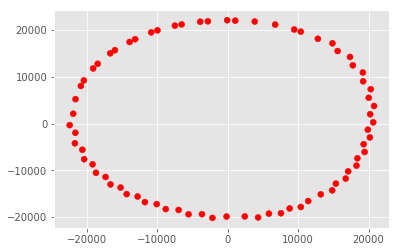

In [73]:
plt.scatter(T[:,0], T[:,1], c=colors)
plt.show()

Chart a 3D Scatter plot to graph your manifold. You can use either `'o'` or `'.'` as your marker:

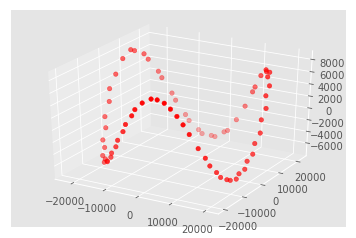

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(T[:,0], T[:,1], T[:,2], c=colors)
plt.show()

Answer the first two lab questions!

Create another for loop. This time it should iterate over all the images in the `Datasets/ALOI/32_i` directory. Just like last time, load up each image, process them the way you did previously, and append them into your existing `samples` list:

In [75]:
import os
from scipy import misc

#samples = []

directory = os.fsencode("./Datasets/ALOI/32i/")

i = 0

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".png"): 
        i += 1
        
        # Load the image up
        img = misc.imread("./Datasets/ALOI/32i/" + filename)
        
        # Is the image too big? Resample it down by an order of magnitude
        #img = img[::2, ::2]
        
        # Scale colors from (0-255) to (0-1), then reshape to 1D array per pixel, e.g. grayscale
        # If you had color images and wanted to preserve all color channels, use .reshape(-1,3)
        #X = (img / 255.0).reshape(-1)
        
        X = img.reshape(-1)
        
        samples.append(X)
        colors.append("b")
        
    else:
        continue

print(i)

12


Convert `samples` to a DataFrame named `df`:

In [76]:
df = pd.DataFrame(samples)

Import any necessary libraries to perform Isomap here, reduce `df` down to three components and using `K=6` for your neighborhood size:

In [77]:
from sklearn import manifold

iso = manifold.Isomap(n_neighbors=6, n_components=3)
iso.fit(df)

T = iso.transform(df)

manifold.Isomap(eigen_solver='auto', max_iter=None, n_components=3, n_neighbors=6,
    neighbors_algorithm='auto', path_method='auto', tol=0)

print(df.shape, T.shape)

(84, 27648) (84, 3)


Create a 2D Scatter plot to graph your manifold. You can use either `'o'` or `'.'` as your marker. Graph the first two isomap components:

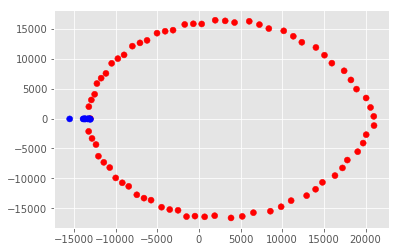

In [78]:
plt.scatter(T[:,0], T[:,1], c = colors)
plt.show()

Chart a 3D Scatter plot to graph your manifold. You can use either `'o'` or `'.'` as your marker:

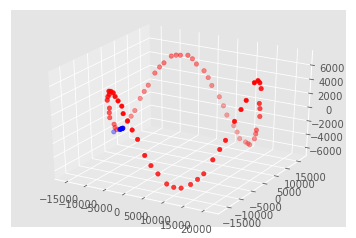

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(T[:,0], T[:,1], T[:,2], c = colors)
plt.show()